In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("UpdatedResumeDataset.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [6]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

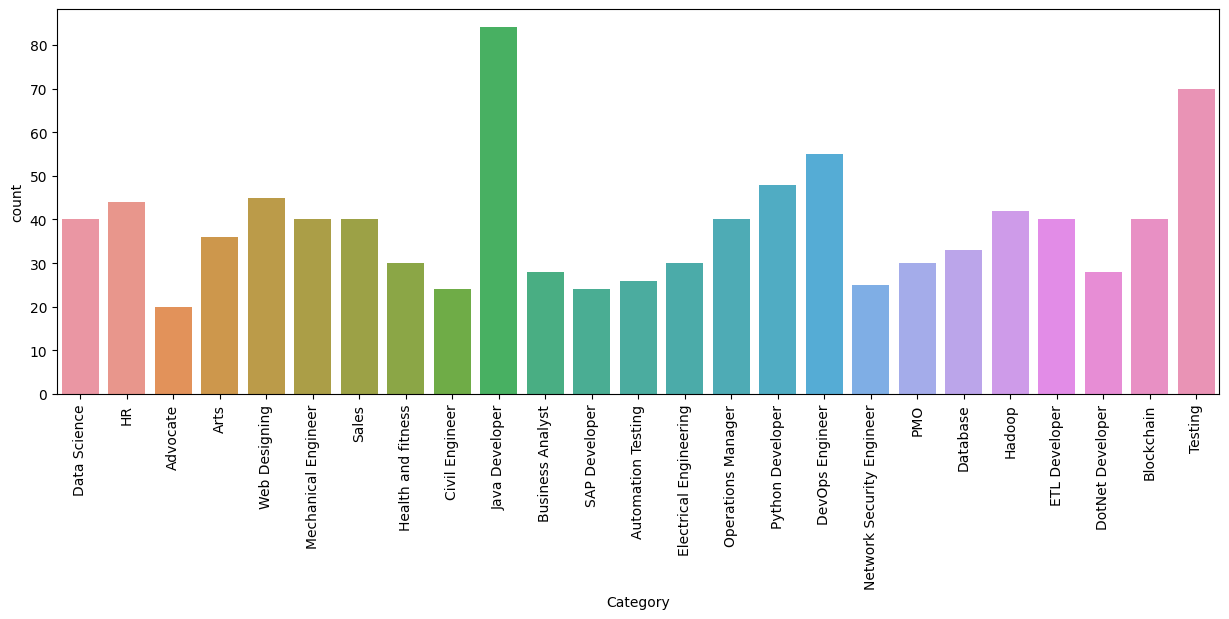

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category',data=df)
plt.xticks(rotation=90)

plt.plot

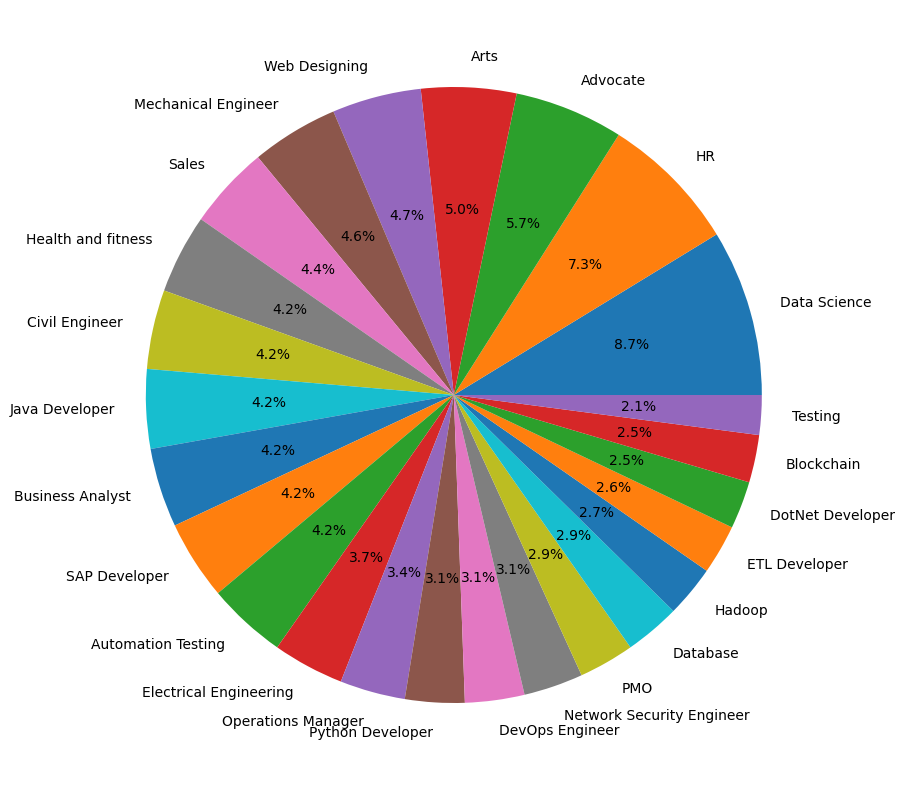

In [8]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

In [9]:

import re
def CleanResume(txt):
    
    cleantxt= re.sub('http\S+\s',' ',txt)#to remove links
    # checkout for cc and rt  
    cleantxt= re.sub (r"\b(a|an|the|and|to|from|this|It|be|for)\b",' ',cleantxt)#to remove common words
    cleantxt= re.sub('\S*@\S*\s?',' ',cleantxt)#to remove mail address
    cleantxt= re.sub('#\S+',' ',cleantxt)#to remove hastags
    cleantxt= re.sub('[^a-zA-Z0-9 ]',' ',cleantxt)
    cleantxt= re.sub('\s+',' ',cleantxt)
    
    return cleantxt


In [10]:

print(CleanResume("hello this is @ D:drive and is from #12"))

hello is D drive is 


In [11]:
CleanResume(df['Resume'][0])

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating review proc

In [12]:
df['Resume']=df['Resume'].apply(lambda x:CleanResume(x))

In [13]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 May 2017 B E UIT RG...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness accept challenges Positive thinki...
959    PERSONAL SKILLS Quick learner Eagerness learn ...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [16]:
df['Category'].unique()


array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [17]:
"""['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']"""

"['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',\n       'Mechanical Engineer', 'Sales', 'Health and fitness',\n       'Civil Engineer', 'Java Developer', 'Business Analyst',\n       'SAP Developer', 'Automation Testing', 'Electrical Engineering',\n       'Operations Manager', 'Python Developer', 'DevOps Engineer',\n       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',\n       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']"

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

In [28]:
tfidf.fit(df['Resume'])
req_text=tfidf.transform(df['Resume'])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(req_text,df['Category'],test_size=0.2,random_state=42)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred=clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [41]:
import pickle 
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))